In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('TOI.csv',comment = '#')

In [156]:
df.head()

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,-0.085,...,4.19,0.07,-0.07,0,2.16986,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,-0.102,...,4.03,0.09,-0.09,0,2.01000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,-0.206,...,NaN,NaN,NaN,0,5.73000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,-0.041,...,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,-0.069,...,4.14,0.07,-0.07,0,2.15000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [157]:
df.columns

Index(['toi', 'tid', 'tfopwg_disp', 'rastr', 'ra', 'decstr', 'dec', 'st_pmra',
       'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec', 'st_pmdecerr1',
       'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid', 'pl_tranmiderr1',
       'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh', 'pl_trandurherr1',
       'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandep', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_trandeplim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2',
       'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
       'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist',
       'st_disterr1', 'st_disterr2', 'st_distlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_logg', 'st_loggerr1', 'st_loggerr2',
       'st_logglim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
       'toi_created', 'rowupda

In [158]:
print(df.shape)
df.info()

(7668, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   toi              7668 non-null   float64
 1   tid              7668 non-null   int64  
 2   tfopwg_disp      7668 non-null   object 
 3   rastr            7668 non-null   object 
 4   ra               7668 non-null   float64
 5   decstr           7668 non-null   object 
 6   dec              7668 non-null   float64
 7   st_pmra          7534 non-null   float64
 8   st_pmraerr1      7534 non-null   float64
 9   st_pmraerr2      7534 non-null   float64
 10  st_pmralim       7534 non-null   float64
 11  st_pmdec         7534 non-null   float64
 12  st_pmdecerr1     7534 non-null   float64
 13  st_pmdecerr2     7534 non-null   float64
 14  st_pmdeclim      7534 non-null   float64
 15  pl_tranmid       7668 non-null   float64
 16  pl_tranmiderr1   7657 non-null   float64
 17  pl_

In [159]:
df['tfopwg_disp'].value_counts()

tfopwg_disp
PC     4675
FP     1192
CP      679
KP      565
APC     459
FA       98
Name: count, dtype: int64

### PC (Planet Candidate) : Requires more tests to be a exoplanet
### FP (False Positive) : Not an exoplanet
### KP (Known Planet) : Already an exoplanet but TESS re-discovered it
### CP (Confirmed Planet) : AN Actual Exoplanet

In [160]:
null_columns = df.columns[df.isnull().any()]
print(null_columns)

Index(['st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec',
       'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmiderr1',
       'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'st_dist', 'st_disterr1', 'st_disterr2',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_loggerr1',
       'st_loggerr2', 'st_rad', 'st_raderr1', 'st_raderr2'],
      dtype='object')


In [161]:
cols_with_null = df.columns[df.isnull().sum() > 0]
cols_with_null

Index(['st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec',
       'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmiderr1',
       'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'st_dist', 'st_disterr1', 'st_disterr2',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_loggerr1',
       'st_loggerr2', 'st_rad', 'st_raderr1', 'st_raderr2'],
      dtype='object')

In [162]:
err_col = [col for col in cols_with_null if 'err' in col]

no_err_col = [col for col in cols_with_null if 'err' not in col]

print('Error columns: ',err_col)
print('No Error columns: ',no_err_col)

Error columns:  ['st_pmraerr1', 'st_pmraerr2', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_radeerr1', 'pl_radeerr2', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqterr1', 'pl_eqterr2', 'st_disterr1', 'st_disterr2', 'st_tefferr1', 'st_tefferr2', 'st_loggerr1', 'st_loggerr2', 'st_raderr1', 'st_raderr2']
No Error columns:  ['st_pmra', 'st_pmralim', 'st_pmdec', 'st_pmdeclim', 'pl_orbper', 'pl_rade', 'pl_insol', 'pl_insollim', 'pl_eqt', 'pl_eqtlim', 'st_dist', 'st_teff', 'st_logg', 'st_rad']


In [163]:
len(err_col)

26

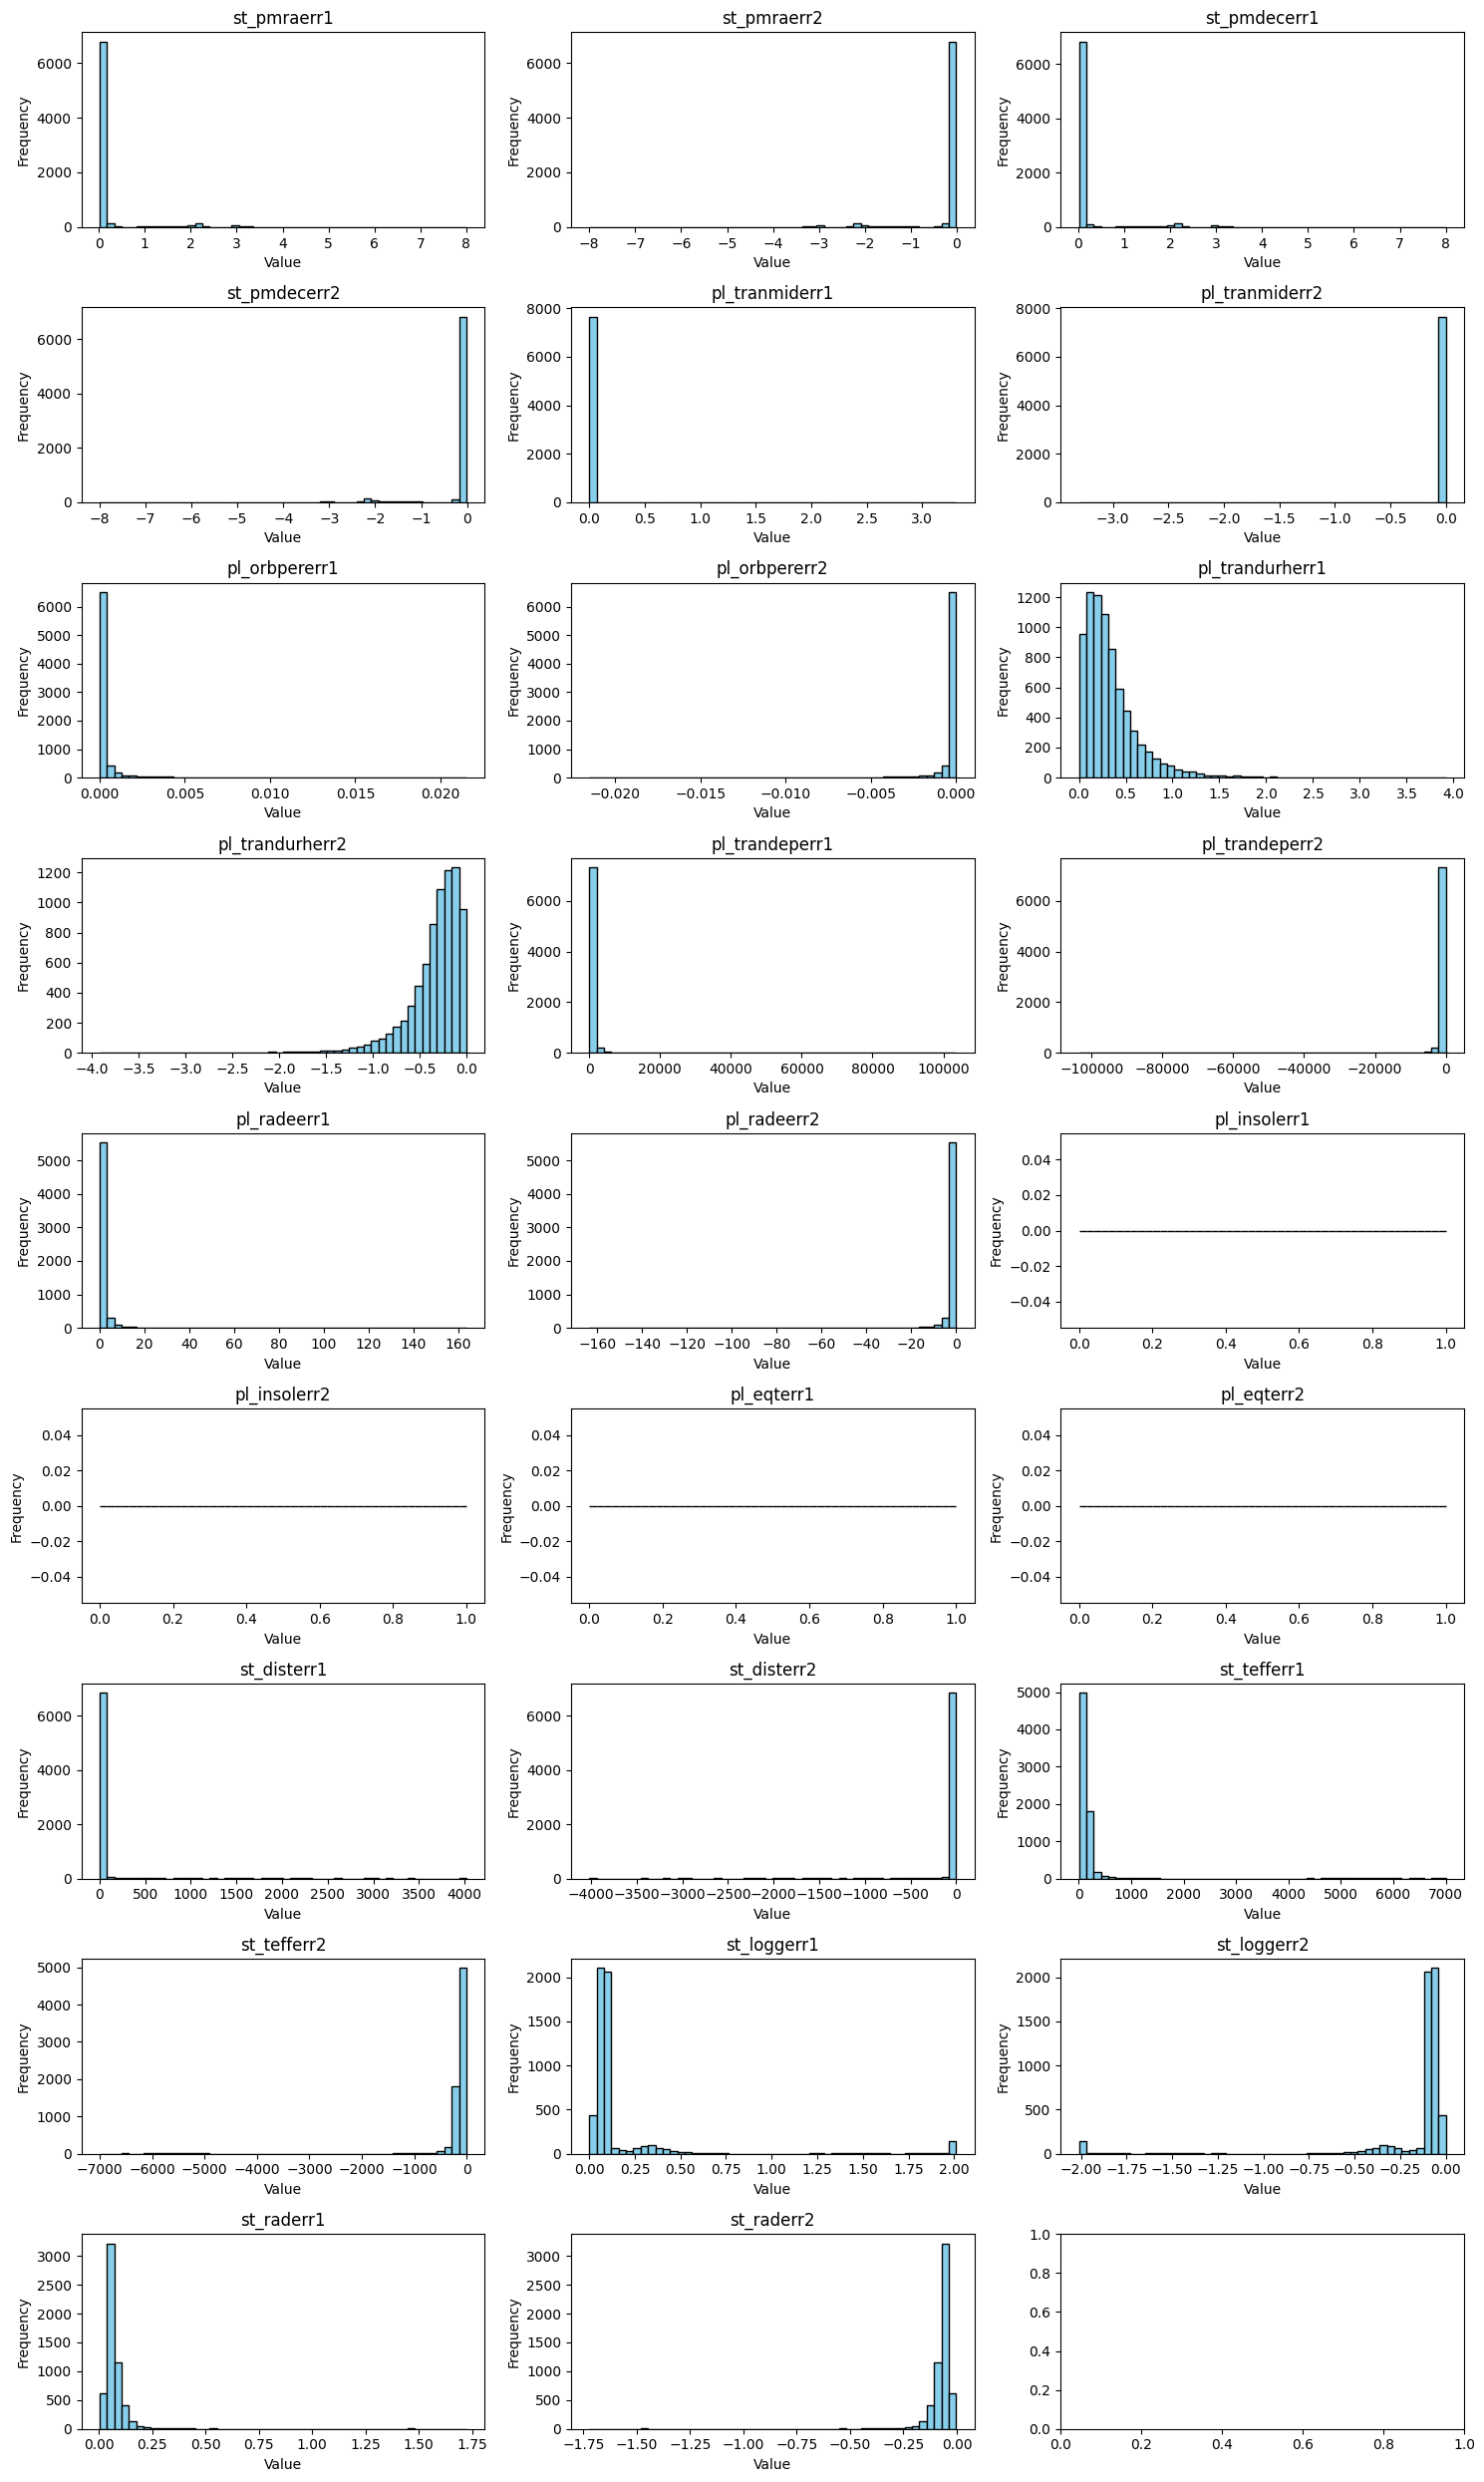

In [164]:
#plotting for the error cols

fig,axes = plt.subplots(nrows = 9, ncols = 3, figsize = (15,25))
axes = axes.flatten()

for i, col in enumerate(err_col):
  data = df[col].dropna()

  axes[i].hist(data, bins =50, color = 'skyblue', edgecolor = 'black')
  axes[i].set_title(col)
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Useful columns

target column > tfopwg_disp
<br>
and
<br> 
pl_orbper,pl_trandurh,pl_trandep,pl_rade,
plt_insol,pl_eqt,pl_tranmid
<br>
and
<br>
st_tmag,st_dist,st_teff,st_logg,st_rad

In [165]:
cols_to_drop = err_col + ['toi','tid','rastr','decstr','toi_created','rowupdate']
df = df.drop(columns = cols_to_drop)
df.shape

(7668, 33)

In [166]:
df.columns

Index(['tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmralim', 'st_pmdec',
       'st_pmdeclim', 'pl_tranmid', 'pl_tranmidlim', 'pl_orbper',
       'pl_orbperlim', 'pl_trandurh', 'pl_trandurhlim', 'pl_trandep',
       'pl_trandeplim', 'pl_rade', 'pl_radelim', 'pl_insol', 'pl_insollim',
       'pl_eqt', 'pl_eqtlim', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2',
       'st_tmaglim', 'st_dist', 'st_distlim', 'st_teff', 'st_tefflim',
       'st_logg', 'st_logglim', 'st_rad', 'st_radlim'],
      dtype='object')

In [167]:
null_counts = df.isnull().sum()
cols_with_null = null_counts[null_counts > 0]

print(df.shape)
print(cols_with_null)

(7668, 33)
st_pmra         134
st_pmralim      134
st_pmdec        134
st_pmdeclim     134
pl_orbper       106
pl_rade         504
pl_insol        176
pl_insollim    7668
pl_eqt          311
pl_eqtlim      7668
st_dist         215
st_teff         161
st_logg         856
st_rad          505
dtype: int64


In [168]:
df = df.drop(columns= ['pl_insollim','pl_eqtlim'])
df.shape

(7668, 31)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tfopwg_disp     7668 non-null   object 
 1   ra              7668 non-null   float64
 2   dec             7668 non-null   float64
 3   st_pmra         7534 non-null   float64
 4   st_pmralim      7534 non-null   float64
 5   st_pmdec        7534 non-null   float64
 6   st_pmdeclim     7534 non-null   float64
 7   pl_tranmid      7668 non-null   float64
 8   pl_tranmidlim   7668 non-null   int64  
 9   pl_orbper       7562 non-null   float64
 10  pl_orbperlim    7668 non-null   int64  
 11  pl_trandurh     7668 non-null   float64
 12  pl_trandurhlim  7668 non-null   int64  
 13  pl_trandep      7668 non-null   float64
 14  pl_trandeplim   7668 non-null   int64  
 15  pl_rade         7164 non-null   float64
 16  pl_radelim      7668 non-null   int64  
 17  pl_insol        7492 non-null   f

In [170]:
null_counts = df.isnull().sum()
cols_with_null = null_counts[null_counts > 0]

print(df.shape)
print(cols_with_null)

(7668, 31)
st_pmra        134
st_pmralim     134
st_pmdec       134
st_pmdeclim    134
pl_orbper      106
pl_rade        504
pl_insol       176
pl_eqt         311
st_dist        215
st_teff        161
st_logg        856
st_rad         505
dtype: int64


### less imp cols are st_pmralim and st_pmdeclim

In [171]:
cols_with_null.index

Index(['st_pmra', 'st_pmralim', 'st_pmdec', 'st_pmdeclim', 'pl_orbper',
       'pl_rade', 'pl_insol', 'pl_eqt', 'st_dist', 'st_teff', 'st_logg',
       'st_rad'],
      dtype='object')

In [172]:
# drop less imp col
# df = df.drop(columns = ['st_pmralim','st_pmdeclim'])

# fill nan values with median
for col in cols_with_null.index:
  df[col] = df[col].fillna(df[col].median())


In [173]:
print(df.shape)
print(df.info())

(7668, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tfopwg_disp     7668 non-null   object 
 1   ra              7668 non-null   float64
 2   dec             7668 non-null   float64
 3   st_pmra         7668 non-null   float64
 4   st_pmralim      7668 non-null   float64
 5   st_pmdec        7668 non-null   float64
 6   st_pmdeclim     7668 non-null   float64
 7   pl_tranmid      7668 non-null   float64
 8   pl_tranmidlim   7668 non-null   int64  
 9   pl_orbper       7668 non-null   float64
 10  pl_orbperlim    7668 non-null   int64  
 11  pl_trandurh     7668 non-null   float64
 12  pl_trandurhlim  7668 non-null   int64  
 13  pl_trandep      7668 non-null   float64
 14  pl_trandeplim   7668 non-null   int64  
 15  pl_rade         7668 non-null   float64
 16  pl_radelim      7668 non-null   int64  
 17  pl_insol        7668 n

In [174]:
df.columns


Index(['tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmralim', 'st_pmdec',
       'st_pmdeclim', 'pl_tranmid', 'pl_tranmidlim', 'pl_orbper',
       'pl_orbperlim', 'pl_trandurh', 'pl_trandurhlim', 'pl_trandep',
       'pl_trandeplim', 'pl_rade', 'pl_radelim', 'pl_insol', 'pl_eqt',
       'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist',
       'st_distlim', 'st_teff', 'st_tefflim', 'st_logg', 'st_logglim',
       'st_rad', 'st_radlim'],
      dtype='object')

In [175]:
disposition_counts = df['tfopwg_disp'].value_counts()
print(disposition_counts)

tfopwg_disp
PC     4675
FP     1192
CP      679
KP      565
APC     459
FA       98
Name: count, dtype: int64


In [176]:

encoding_map = {
    'FP': 0,   # False Positive
    'APC': 0,  # Astrophysical Planet Candidate (also a type of FP)
    'FA': 0,   # Instrumental Artifact (also a type of FP)
    'PC': 1,   # Planet Candidate
    'CP': 2,   # Confirmed Planet
    'KP': 2    # Known Planet (also confirmed)
}


df['target_encoded'] = df['tfopwg_disp'].map(encoding_map)

print("\nValue counts for the new encoded target column:")
print(df['target_encoded'].value_counts())


Value counts for the new encoded target column:
target_encoded
1    4675
0    1749
2    1244
Name: count, dtype: int64


In [177]:
df['target_encoded'].isnull().sum()

np.int64(0)

In [178]:
y = df['target_encoded']

In [179]:
print(df.shape)
df.columns

(7668, 32)


Index(['tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmralim', 'st_pmdec',
       'st_pmdeclim', 'pl_tranmid', 'pl_tranmidlim', 'pl_orbper',
       'pl_orbperlim', 'pl_trandurh', 'pl_trandurhlim', 'pl_trandep',
       'pl_trandeplim', 'pl_rade', 'pl_radelim', 'pl_insol', 'pl_eqt',
       'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist',
       'st_distlim', 'st_teff', 'st_tefflim', 'st_logg', 'st_logglim',
       'st_rad', 'st_radlim', 'target_encoded'],
      dtype='object')

In [180]:

y = df['target_encoded']


columns_to_drop = [
    'tfopwg_disp', 
    'target_encoded',
    'pl_tranmidlim',
    'pl_orbperlim',
    'pl_trandurhlim',
    'pl_trandeplim',
    'pl_radelim',
    'st_tmaglim',
    'st_distlim',
    'st_tefflim',
    'st_logglim',
    'st_radlim',
    'st_tmagerr1',
    'st_tmagerr2'
]

X = df.drop(columns=columns_to_drop)


In [181]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ra           7668 non-null   float64
 1   dec          7668 non-null   float64
 2   st_pmra      7668 non-null   float64
 3   st_pmralim   7668 non-null   float64
 4   st_pmdec     7668 non-null   float64
 5   st_pmdeclim  7668 non-null   float64
 6   pl_tranmid   7668 non-null   float64
 7   pl_orbper    7668 non-null   float64
 8   pl_trandurh  7668 non-null   float64
 9   pl_trandep   7668 non-null   float64
 10  pl_rade      7668 non-null   float64
 11  pl_insol     7668 non-null   float64
 12  pl_eqt       7668 non-null   float64
 13  st_tmag      7668 non-null   float64
 14  st_dist      7668 non-null   float64
 15  st_teff      7668 non-null   float64
 16  st_logg      7668 non-null   float64
 17  st_rad       7668 non-null   float64
dtypes: float64(18)
memory usage: 1.1 MB
None


In [109]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 112.5 kB/s eta 0:01:21
   -- ------------------------------------- 0.5/9.6 MB 112.5 kB/s eta 0:01:21
   -- ----------

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_after_drop = X.drop(columns=['pl_insol'])


vif_data = pd.DataFrame()
vif_data["feature"] = X_after_drop.columns


vif_data["VIF"] = [variance_inflation_factor(X_after_drop.values, i) for i in range(len(X_after_drop.columns))]


vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data_sorted)

c:\Python3.13\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


        feature         VIF
6    pl_tranmid  491.920318
15      st_logg  347.114983
12      st_tmag   80.365155
14      st_teff   24.824426
11       pl_eqt    7.692153
10      pl_rade    6.393118
8   pl_trandurh    4.363857
0            ra    4.199430
16       st_rad    4.087211
13      st_dist    2.427081
9    pl_trandep    1.584076
7     pl_orbper    1.129744
1           dec    1.057930
4      st_pmdec    1.054034
2       st_pmra    1.005267
3    st_pmralim         NaN
5   st_pmdeclim         NaN


In [183]:
final_features = [
    'ra', 
    'dec', 
    'st_pmra', 
    'st_pmdec', 
    'pl_orbper', 
    'pl_trandurh', 
    'pl_trandep', 
    'pl_rade', 
    'pl_eqt', 
    'st_dist', 
    'st_teff', 
    'st_rad'
]

X_final = X[final_features]

In [184]:
X.to_csv('sample_toi.csv', index=False)
y.to_csv('target_toi.csv', index=False)

In [185]:
print(y.value_counts())
print(y.isnull().sum())

target_encoded
1    4675
0    1749
2    1244
Name: count, dtype: int64
0


In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [149]:
pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---

In [151]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.3 MB/s eta 0:00:43
    --------------------------------------- 0.8/56.8 MB 1.4 MB/s eta 0:00:41
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:49
    ---------

In [188]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=18,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    max_depth=9,
    learning_rate=0.08,
    subsample=0.85,
    colsample_bytree=0.85,
    random_state=42,
    eval_metric="mlogloss"   # avoids deprecation warnings
)

cat_model = CatBoostClassifier(
    iterations=200,
    depth=9,
    learning_rate=0.08,
    random_seed=42,
    verbose=False
)

ensemble = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('cat', cat_model)],
    voting='soft'
)

ensemble.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred = ensemble.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, ensemble.predict_proba(X_test), multi_class='ovr')
cv_scores = cross_val_score(ensemble, X, y, cv=5)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"AUC-ROC: {auc:.4f}")
print(f"CV Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9452 (94.52%)
AUC-ROC: 0.9832
CV Score: 0.6815 ± 0.0238

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       350
           1       0.94      0.98      0.96       935
           2       0.98      0.90      0.94       249

    accuracy                           0.95      1534
   macro avg       0.95      0.92      0.94      1534
weighted avg       0.95      0.95      0.94      1534



In [153]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 1.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.5 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.0 MB/s  0:00:01


In [189]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Convert categorical columns to category dtype if any

results = []
n_splits = 5
n_repeats = 3  # number of times to run CV

for repeat in range(n_repeats):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42 + repeat)
    fold_accuracies = []
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

        params = {
            'objective': 'multiclass',
            'num_class': 3,
            'metric': 'multi_logloss',
            'verbosity': -1,
            'boosting_type': 'gbdt',
            'seed': 42 + repeat,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'num_leaves': 31,
            'learning_rate': 0.05,
            'max_depth': -1
        }

        model = lgb.train(
            params,
            train_data,
            num_boost_round=1000,
            valid_sets=[val_data],
            # early_stopping_rounds=50, # Removed this line
            # verbose_eval=False # Removed this line
        )

        y_pred = model.predict(X_val, num_iteration=model.best_iteration)
        y_pred_labels = np.argmax(y_pred, axis=1)

        acc = accuracy_score(y_val, y_pred_labels)
        fold_accuracies.append(acc)

    mean_acc = np.mean(fold_accuracies)
    results.append(mean_acc)
    print(f"Repeat {repeat+1}, Mean accuracy: {mean_acc:.4f}")

print(f"Overall mean accuracy across {n_repeats} repeats: {np.mean(results):.4f}, Std: {np.std(results):.4f}")

Repeat 1, Mean accuracy: 0.7359
Repeat 2, Mean accuracy: 0.7389
Repeat 3, Mean accuracy: 0.7450
Overall mean accuracy across 3 repeats: 0.7400, Std: 0.0038
